### Crop Yield Prediction ###

In [1]:
!pip install pandas
!pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [7]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/3. AI/AI cw/Dataset.csv')
df

ModuleNotFoundError: No module named 'google'

In [3]:
df.replace('Reddish Brown Latosolic soil ', 'Reddish Brown Latosolic soil', inplace=True)
df.replace('Reddish Brown Earths ', 'Reddish Brown Earths', inplace=True)

In [4]:
df = df.dropna(axis=0).reset_index(drop=True) #removing missing values instead of filling it as there are several missing values

In [5]:
df.isnull().sum() #confirming the removal of missing values

District              0
Total-Extent          0
Total-Yield           0
Crop                  0
Mean precipitation    0
Mean temperature      0
Soil_type             0
dtype: int64

In [6]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=['Soil_type'])
df = pd.get_dummies(df, columns=['District'])
df = pd.get_dummies(df, columns=['Crop '])

X = df.drop(labels=['Total-Yield'], axis=1) #set of features
y = df['Total-Yield'] #variable to be predicted

df

,Total-Extent,Total-Yield,Mean precipitation,Mean temperature,Soil_type_Immature Brown Loam,Soil_type_Red Yellow Latosols,Soil_type_Red Yellow Podzolic soils,Soil_type_Reddish Brown Earths,Soil_type_Reddish Brown Latosolic soil,Soil_type_Regosols,...,District_Nuwara Eliya,District_Polonnaruwa,District_Puttalam,District_Ratnapura,District_Trincomalee,District_Vavuniya,Crop _Capsicum,Crop _Ginger,Crop _Red Pumpkin,Crop _Tomatoes
0,7.0,35.0,1894.93,27.15,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,59.0,190.0,1894.93,27.15,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,47.0,204.0,1894.93,27.15,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,121.0,213.0,1551.51,24.66,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,225.0,1241.0,1551.51,24.66,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,70.4,716.8,1343.54,28.51,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1901,1366.3,19409.6,1591.01,26.69,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1902,223.0,2450.6,1532.87,28.32,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1903,275.0,5240.3,2261.05,26.27,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [7]:
X.columns

Index(['Total-Extent', 'Mean precipitation', 'Mean temperature',
       'Soil_type_Immature Brown Loam', 'Soil_type_Red Yellow Latosols',
       'Soil_type_Red Yellow Podzolic soils', 'Soil_type_Reddish Brown Earths',
       'Soil_type_Reddish Brown Latosolic soil', 'Soil_type_Regosols',
       'District_Ampara', 'District_Anuradhapura', 'District_Badulla',
       'District_Batticaloa', 'District_Colombo', 'District_Galle',
       'District_Gampaha', 'District_Hanbantota', 'District_Jaffna',
       'District_Kaluthara', 'District_Kandy', 'District_Kegalle',
       'District_Kilinochchi', 'District_Kurunegala', 'District_Mannar',
       'District_Matale', 'District_Matara', 'District_Monaragala',
       'District_Mullativu', 'District_Nuwara Eliya', 'District_Polonnaruwa',
       'District_Puttalam', 'District_Ratnapura', 'District_Trincomalee',
       'District_Vavuniya', 'Crop _Capsicum', 'Crop _Ginger',
       'Crop _Red Pumpkin', 'Crop _Tomatoes'],
      dtype='object')

In [8]:
X_reg_train,X_reg_test,y_reg_train,y_reg_test = train_test_split(X,y,test_size = 0.2,random_state= 42)
#splitting the data - 20% for testing and 80% for training

In [9]:
rf_reg = RandomForestRegressor(n_estimators=150, random_state=46)
rf_reg.fit(X_reg_train,y_reg_train)  #fitting the model

RandomForestRegressor(n_estimators=150, random_state=46)

In [10]:
score = rf_reg.score(X_reg_train , y_reg_train )
y_pred_reg = rf_reg.predict(X_reg_test )

mae = metrics.mean_absolute_error(y_reg_test,y_pred_reg)
mse = metrics.mean_squared_error(y_reg_test,y_pred_reg)
r2 = metrics.r2_score(y_reg_test, y_pred_reg)

print(f"Training R-squared training (RF): {score}")
print(f'Mean absolute error (RF):{mae}')
print(f'Mean squared error (RF):{mse}')
print(f'R-squared coefficient (RF):{r2}')

Training R-squared training (RF): 0.985250340890267
Mean absolute error (RF):488.6602169728786
Mean squared error (RF):1653729.0449848606
R-squared coefficient (RF):0.9026235915113272


In [11]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(n_estimators=150, random_state=46)

# Fitting the model
xgb_reg.fit(X_reg_train, y_reg_train)

y_pred_train_xgb = xgb_reg.predict(X_reg_train)
y_pred_test_xgb = xgb_reg.predict(X_reg_test)

r2_train_xgb = metrics.r2_score(y_reg_train, y_pred_train_xgb)

mae_xgb = metrics.mean_absolute_error(y_reg_test, y_pred_test_xgb)
mse_xgb = metrics.mean_squared_error(y_reg_test, y_pred_test_xgb)
r2_test_xgb = metrics.r2_score(y_reg_test, y_pred_test_xgb)

print(f"R-squared for training data (XGB): {r2_train_xgb}")
print(f'Mean absolute error (XGB): {mae_xgb}')
print(f'Mean squared error (XGB): {mse_xgb}')
print(f'R-squared for test data (XGB): {r2_test_xgb}')

R-squared for training data (XGB): 0.9998819723038594
Mean absolute error (XGB): 467.64659062298574
Mean squared error (XGB): 1529606.471635683
R-squared for test data (XGB): 0.9099322920761319


In [12]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor(n_estimators=150, random_state=46)

# Fitting the model to the training data
lgb_reg.fit(X_reg_train, y_reg_train)

y_pred_train_lgb = lgb_reg.predict(X_reg_train)
y_pred_test_lgb = lgb_reg.predict(X_reg_test)

r2_train_lgb = metrics.r2_score(y_reg_train, y_pred_train_lgb)

mae_lgb = metrics.mean_absolute_error(y_reg_test, y_pred_test_lgb)
mse_lgb = metrics.mean_squared_error(y_reg_test, y_pred_test_lgb)
r2_test_lgb = metrics.r2_score(y_reg_test, y_pred_test_lgb)

print(f"R-squared for training data (LightGBM): {r2_train_lgb}")
print(f'Mean absolute error (LightGBM): {mae_lgb}')
print(f'Mean squared error (LightGBM): {mse_lgb}')
print(f'R-squared for test data (LightGBM): {r2_test_lgb}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 1524, number of used features: 38
[LightGBM] [Info] Start training from score 1951.624869
R-squared for training data (LightGBM): 0.9450050890731101
Mean absolute error (LightGBM): 449.0182640496159
Mean squared error (LightGBM): 1084954.6407000043
R-squared for test data (LightGBM): 0.9361146938763164


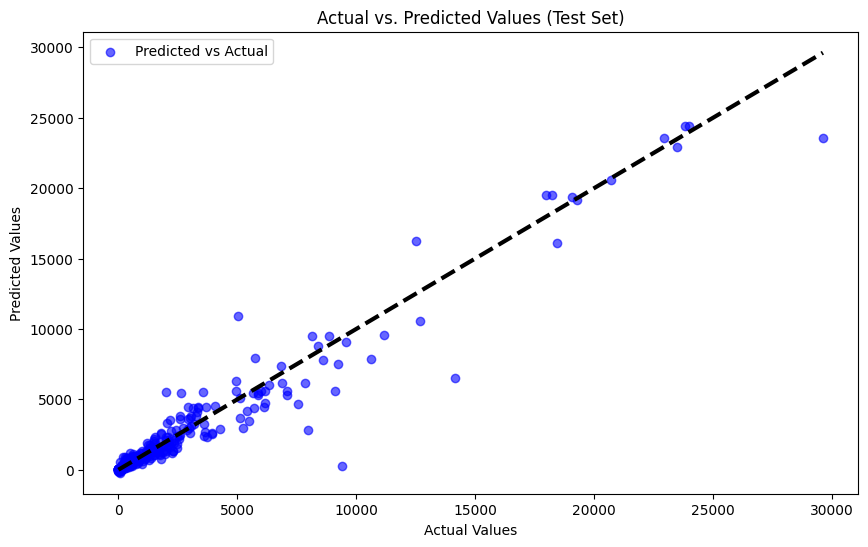

In [13]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted Values for the Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_pred_test_lgb, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'k--', lw=3)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')
plt.legend()
plt.show()


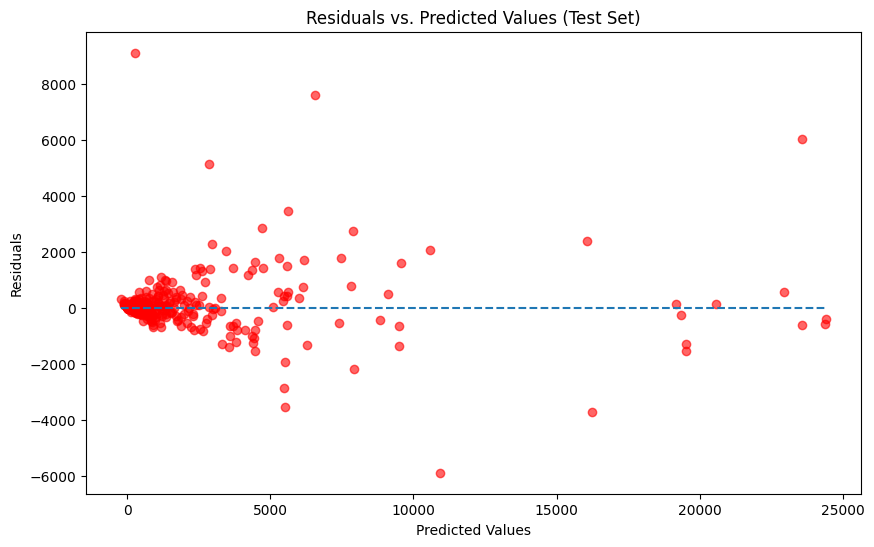

In [14]:
# Calculating residuals for the test set
residuals = y_reg_test - y_pred_test_lgb

# Plotting Residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_lgb, residuals, alpha=0.6, color='red')
plt.hlines(y=0, xmin=y_pred_test_lgb.min(), xmax=y_pred_test_lgb.max(), linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Test Set)')
plt.show()


## Predictions ##

In [15]:
district = input('Enter district: ')
soil_type = input('Enter soil type: ')
temperature = float(input('Enter mean temperature: '))
precipitation = float(input('Enter mean precipitation: '))
total_extent = float(input('Enter land size: '))
crop_type = input('Enter type of crop: ')

# DataFrame with the input data
input_data = pd.DataFrame({
    'District': [district],
    'Soil_type': [soil_type],
    'Mean temperature': [temperature],
    'Mean precipitation': [precipitation],
    'Total-Extent': [total_extent],
    'Crop ': [crop_type]
})

# One-hot encoding the categorical variables
input_data_encoded = pd.get_dummies(input_data, columns=['District', 'Soil_type', 'Crop '])

# DataFrame with zeros for all columns required for the model
model_columns = ['Total-Extent', 'Mean precipitation', 'Mean temperature',
                 'Soil_type_Immature Brown Loam', 'Soil_type_Red Yellow Latosols',
                 'Soil_type_Red Yellow Podzolic soils', 'Soil_type_Reddish Brown Earths',
                 'Soil_type_Reddish Brown Latosolic soil',
                 'Soil_type_Regosols', 'District_Ampara', 'District_Anuradhapura',
                 'District_Badulla', 'District_Batticaloa', 'District_Colombo',
                 'District_Galle', 'District_Gampaha', 'District_Hanbantota',
                 'District_Jaffna', 'District_Kaluthara', 'District_Kandy',
                 'District_Kegalle', 'District_Kilinochchi', 'District_Kurunegala',
                 'District_Mannar', 'District_Matale', 'District_Matara',
                 'District_Monaragala', 'District_Mullativu', 'District_Nuwara Eliya',
                 'District_Polonnaruwa', 'District_Puttalam', 'District_Ratnapura',
                 'District_Trincomalee', 'District_Vavuniya', 'Crop _Capsicum',
                 'Crop _Ginger', 'Crop _Red Pumpkin', 'Crop _Tomatoes']


# Drop columns from input_data_encoded that are completely empty
input_data_encoded = input_data_encoded.dropna(axis=1, how='all')

# Create a DataFrame with the required columns
input_df = pd.DataFrame(columns=model_columns, index=[0])
input_df = input_df.fillna(0)

for column in input_data_encoded.columns:
    if column in input_df.columns:
        input_df[column] = input_data_encoded[column]

input_df.fillna(0, inplace=True)

# Reorder the columns as per the model's training data
input_df = input_df[model_columns]

# Predict the crop yield
predicted_yield = lgb_reg.predict(input_df)

print(f"The predicted crop yield is: {predicted_yield[0]}")

Enter district: District_Colombo
Enter soil type: Soil_type_Red Yellow Latosols
Enter mean temperature: 34
Enter mean precipitation: 700
Enter land size: 10
Enter type of crop: Crop _Tomatoes
The predicted crop yield is: 102.39259278147374
